<a id='top'> </a>
Author: [James Bourbeau](http://www.jamesbourbeau.com)

In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,matplotlib,scipy,pandas,sklearn,mlxtend

last updated: 2017-03-14 

CPython 2.7.10
IPython 5.3.0

numpy 1.12.0
matplotlib 2.0.0
scipy 0.15.1
pandas 0.19.2
sklearn 0.18.1
mlxtend 0.5.1


# Model parameter-tuning
### Table of contents
2. [Validation curves](#Validation-curves)
3. [KS-test tuning](#KS-test-tuning)

In [2]:
from __future__ import division, print_function
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import composition as comp
import composition.analysis.plotting as plotting

color_dict = comp.analysis.get_color_dict()

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Define analysis free parameters
[ [back to top](#top) ]

In [3]:
comp_class = True
comp_list = ['light', 'heavy'] if comp_class else ['P', 'He', 'O', 'Fe']

In [12]:
pipeline_str = 'GBDT'
pipeline = comp.analysis.get_pipeline(pipeline_str)

In [5]:
scoring = 'accuracy'
cv = 10

## Data preprocessing
1. Load simulation dataframe and apply specified quality cuts
2. Extract desired features from dataframe
3. Get separate testing and training datasets

In [48]:
sim_train, sim_test = comp.preprocess_sim(comp_class=comp_class, return_energy=True)

sim quality cut event flow:
             IceTopQualityCuts:    1.0    1.0
         lap_InIce_containment:  0.776  0.776
              InIceQualityCuts:  0.786   0.75
                 num_hits_1_60:  0.999   0.75


Selecting the following features:
	$\cos(\theta_{\mathrm{Lap}})$
	$\log_{10}(S_{\mathrm{125}})$
	$R_{\mathrm{core}}$
	
Number training events = 208926
Number testing events = 89540


In [29]:
def plot_validation_curve(df, xlabel, key='total', ylabel='Classification accuracy', ylim=None, outfile=None):
   
    assert key in ['light', 'heavy', 'total']
    
    plt.plot(df['param_value'], df['train_mean_{}'.format(key)], 
         color='C0', linestyle='-',
         marker='o', markersize=5,
         label='training accuracy')

    plt.fill_between(df['param_value'],
                     df['train_mean_{}'.format(key)] + df['train_std_{}'.format(key)],
                     df['train_mean_{}'.format(key)] - df['train_std_{}'.format(key)],
                     alpha=0.15, color='C0')

    plt.plot(df['param_value'], df['validation_mean_{}'.format(key)], 
             color='C1', linestyle='-', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(df['param_value'],
                     df['validation_mean_{}'.format(key)] + df['validation_std_{}'.format(key)],
                     df['validation_mean_{}'.format(key)] - df['validation_std_{}'.format(key)],
                     alpha=0.15, color='C1')

    plt.grid()
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if ylim: plt.ylim(ylim)
    if outfile: plt.savefig(outfile)

In [30]:
def plot_validation_curve_comp(df, xlabel, ylabel='Classification accuracy', ylim=None, outfile=None):
   
    for key in ['light', 'heavy']:
#     for key in ['light', 'heavy', 'total']:
        plt.plot(df['param_value'], df['train_mean_{}'.format(key)], 
             color=color_dict[key], linestyle='-',
             marker='o', markersize=5,
             label='{} training accuracy'.format(key))

        plt.fill_between(df['param_value'],
                         df['train_mean_{}'.format(key)] + df['train_std_{}'.format(key)],
                         df['train_mean_{}'.format(key)] - df['train_std_{}'.format(key)],
                         alpha=0.15, color=color_dict[key])

        plt.plot(df['param_value'], df['validation_mean_{}'.format(key)], 
                 color=color_dict[key], linestyle=':', 
                 marker='s', markersize=5, 
                 label='{} validation accuracy'.format(key))

        plt.fill_between(df['param_value'],
                         df['validation_mean_{}'.format(key)] + df['validation_std_{}'.format(key)],
                         df['validation_mean_{}'.format(key)] - df['validation_std_{}'.format(key)],
                         alpha=0.15, color=color_dict[key])

    plt.grid()
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if ylim: plt.ylim(ylim)
    if outfile: plt.savefig(outfile)

In [44]:
def plot_ks_curve_comp(df, xlabel, ylabel='Classification accuracy', ylim=None, outfile=None):
   
    for key in ['light', 'heavy']:
        plt.plot(df['param_value'], df['ks_mean_{}'.format(key)], 
             color=color_dict[key], linestyle=':',
             marker='o', markersize=5,
             label=key)

        plt.fill_between(df['param_value'],
                         df['ks_mean_{}'.format(key)] + df['ks_std_{}'.format(key)],
                         df['ks_mean_{}'.format(key)] - df['ks_std_{}'.format(key)],
                         alpha=0.15, color=color_dict[key])

    plt.grid()
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel('KS p-value')
    if ylim: plt.ylim(ylim)
    if outfile: plt.savefig(outfile)

## Maximum depth

In [54]:
df_max_depth = pd.read_csv('data/validation-{}-max_depth-{}-cv{}.csv'.format(pipeline_str, scoring, cv),
                           index_col=0)
df_max_depth.sort_values('param_value', inplace=True)

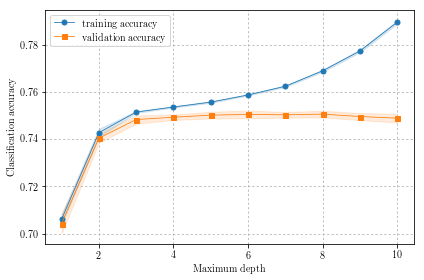

In [55]:
outfile = '/home/jbourbeau/public_html/figures/{}-validation_curve_max_depth.png'.format(pipeline_str)
plot_validation_curve(df_max_depth, xlabel='Maximum depth', outfile=outfile)

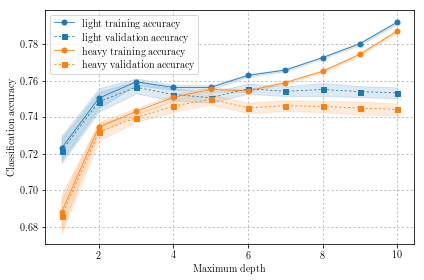

In [56]:
outfile = '/home/jbourbeau/public_html/figures/{}-validation_curve_max_depth_comp.png'.format(pipeline_str)
plot_validation_curve_comp(df_max_depth, xlabel='Maximum depth', outfile=outfile)

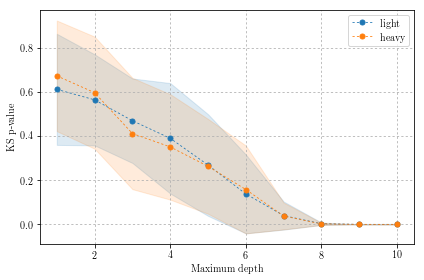

In [57]:
outfile = '/home/jbourbeau/public_html/figures/{}-ks_curve_max_depth_comp.png'.format(pipeline_str)
plot_ks_curve_comp(df_max_depth, xlabel='Maximum depth', outfile=outfile)

## Learning rate

In [58]:
df_learning_rate = pd.read_csv('data/validation-{}-learning_rate-{}-cv{}.csv'.format(pipeline_str, scoring, cv),
                               index_col=0)
df_learning_rate.sort_values('param_value', inplace=True)

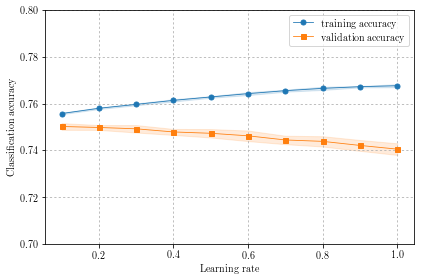

In [59]:
outfile = '/home/jbourbeau/public_html/figures/{}-validation_curve_learning_rate.png'.format(pipeline_str)
plot_validation_curve(df_learning_rate, xlabel='Learning rate', ylim=[0.7, 0.8], outfile=outfile)

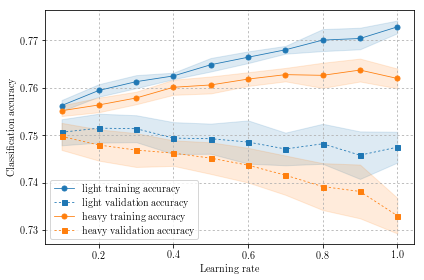

In [60]:
outfile = '/home/jbourbeau/public_html/figures/{}-validation_curve_learning_rate_comp.png'.format(pipeline_str)
plot_validation_curve_comp(df_learning_rate, xlabel='Learning rate', outfile=outfile)

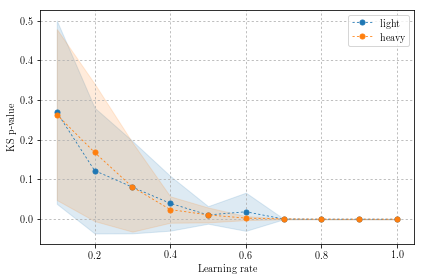

In [61]:
outfile = '/home/jbourbeau/public_html/figures/{}-ks_curve_learning_rate.png'.format(pipeline_str)
plot_ks_curve_comp(df_learning_rate, xlabel='Learning rate', outfile=outfile)

## Number of estimators

In [62]:
df_n_estimators = pd.read_csv('data/validation-{}-n_estimators-{}-cv{}.csv'.format(pipeline_str, scoring, cv),
                              index_col=0)
df_n_estimators.sort_values('param_value', inplace=True)

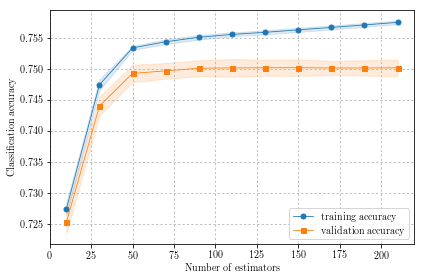

In [63]:
outfile = '/home/jbourbeau/public_html/figures/{}-validation_curve_n_estimators.png'.format(pipeline_str)
plot_validation_curve(df_n_estimators, xlabel='Number of estimators', outfile=outfile)

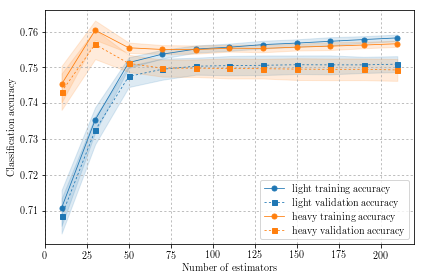

In [64]:
outfile = '/home/jbourbeau/public_html/figures/{}-validation_curve_n_estimators_comp.png'.format(pipeline_str)
plot_validation_curve_comp(df_n_estimators, xlabel='Number of estimators', outfile=outfile)

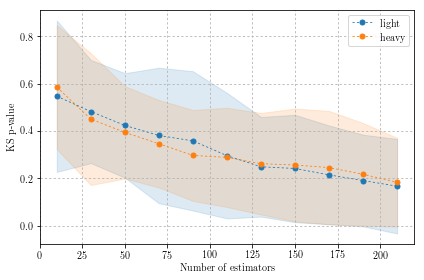

In [65]:
outfile = '/home/jbourbeau/public_html/figures/{}-ks_curve_n_estimators_comp.png'.format(pipeline_str)
plot_ks_curve_comp(df_n_estimators, xlabel='Number of estimators', outfile=outfile)

## Minimum number of samples to split

In [153]:
df_min_samples_split = pd.read_csv('data/validation-{}-min_samples_split-cv10.csv'.format(pipeline_str), index_col=0)
df_min_samples_split.sort_values('param_value', inplace=True)

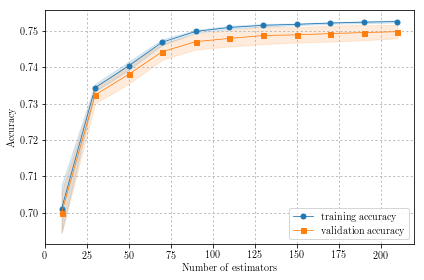

In [155]:
outfile = '/home/jbourbeau/public_html/figures/{}-validation_curve_min_samples_split.png'.format(pipeline_str)
plot_validation_curve(df_min_samples_split, xlabel='Minimum samples to split', outfile=outfile)

## Minimum number of samples in leaf

In [66]:
df_min_samples_leaf = pd.read_csv('data/validation-{}-min_samples_leaf-{}-cv{}.csv'.format(pipeline_str, scoring, cv), index_col=0)
df_min_samples_leaf.sort_values('param_value', inplace=True)

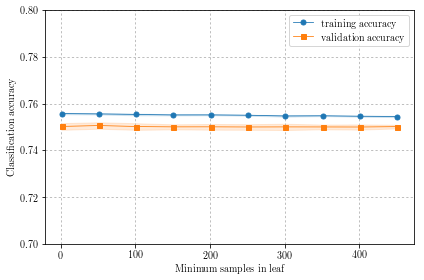

In [67]:
outfile = '/home/jbourbeau/public_html/figures/{}-validation_curve_min_samples_leaf.png'.format(pipeline_str)
plot_validation_curve(df_min_samples_leaf, xlabel='Minimum samples in leaf', ylim=[0.7, 0.8], outfile=outfile)

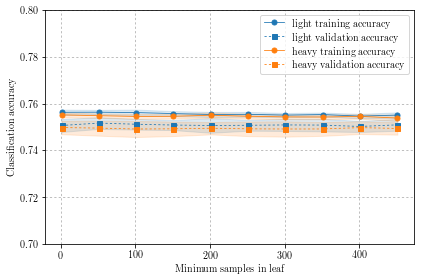

In [68]:
outfile = '/home/jbourbeau/public_html/figures/{}-validation_curve_min_samples_leaf_comp.png'.format(pipeline_str)
plot_validation_curve_comp(df_min_samples_leaf, xlabel='Minimum samples in leaf', ylim=[0.7, 0.8], outfile=outfile)

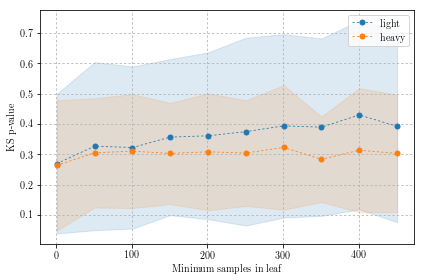

In [69]:
outfile = '/home/jbourbeau/public_html/figures/{}-ks_curve_min_samples_leaf.png'.format(pipeline_str)
plot_ks_curve_comp(df_min_samples_leaf, xlabel='Minimum samples in leaf', outfile=outfile)

In [29]:
# param_range = np.arange(1, 3)
param_range = np.array([4, 5])
train_scores, test_scores = validation_curve(
                estimator=pipeline, 
                X=sim_train.X, 
                y=sim_train.y, 
                param_name='classifier__max_depth', 
                param_range=param_range,
                cv=3,
                scoring='accuracy',
                verbose=2,
                n_jobs=15)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

[CV] classifier__max_depth=4 .........................................
[CV] classifier__max_depth=5 .........................................
[CV] classifier__max_depth=4 .........................................
[CV] classifier__max_depth=5 .........................................
[CV] classifier__max_depth=4 .........................................
[CV] classifier__max_depth=5 .........................................
[CV] .......................... classifier__max_depth=4, total=   3.5s
[CV] .......................... classifier__max_depth=5, total=   3.9s
[CV] .......................... classifier__max_depth=4, total=   5.4s
[CV] .......................... classifier__max_depth=4, total=   5.5s
[CV] .......................... classifier__max_depth=5, total=   5.5s


[Parallel(n_jobs=15)]: Done   3 out of   6 | elapsed:    5.9s remaining:    5.9s


[CV] .......................... classifier__max_depth=5, total=   5.7s


[Parallel(n_jobs=15)]: Done   6 out of   6 | elapsed:    6.3s finished


In [30]:
train_mean, train_std, train_scores

(array([ 0.63220471,  0.66368715]),
 array([ 0.00103565,  0.00123132]),
 array([[ 0.63329337,  0.63081187,  0.63250888],
        [ 0.66535758,  0.66327791,  0.66242596]]))

### KS-test

In [83]:
max_depth_list = np.arange(1, 3)
pval_comp = defaultdict(list)
ks_stat = defaultdict(list)
kf = KFold(n_splits=3)
fold_num = 0
for train_index, test_index in kf.split(sim_train.X):
    fold_num += 1
    print('\r')
    print('Fold {}: '.format(fold_num), end='')
    train_dataset = sim_train[train_index]
    test_dataset = sim_train[test_index]
#     X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
#     y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    pval_maxdepth = defaultdict(list)
#     print('max_depth = ', end='')
    for max_depth in max_depth_list:
        print('{}...'.format(max_depth), end='')
        pipeline.named_steps['classifier'].set_params(max_depth=max_depth)
        pipeline.fit(train_dataset.X, train_dataset.y)
        test_probs = pipeline.predict_proba(test_dataset.X)
        train_probs = pipeline.predict_proba(train_dataset.X)
        for class_ in pipeline.classes_:
            class_train_probs = train_probs[:, class_]
            class_test_probs = test_probs[:, class_]
            print('\n train', class_, class_train_probs.shape)
            print('\n test', class_, class_test_probs.shape)
            print('\n p-value', class_, stats.ks_2samp(class_test_probs, class_train_probs)[1])
            pval_maxdepth[sim_train.le.inverse_transform(class_)].append(stats.ks_2samp(test_probs[:, class_], train_probs[:, class_])[1])
    for composition in comp_list:
#         print(composition, pval_maxdepth[composition])
        pval_comp[composition].append(pval_maxdepth[composition])
pval_sys_err = {composition: np.std(pval_comp[composition], axis=0) for composition in comp_list}
pval = {composition: np.mean(pval_comp[composition], axis=0) for composition in comp_list}


Fold 1: 1...
 train 0 (139284,)

 test 0 (69642,)

 p-value 0 0.0663949669794

 train 1 (139284,)

 test 1 (69642,)

 p-value 1 0.0663949669794
2...
 train 0 (139284,)

 test 0 (69642,)

 p-value 0 0.167866277912

 train 1 (139284,)

 test 1 (69642,)

 p-value 1 0.167866277912

Fold 2: 1...
 train 0 (139284,)

 test 0 (69642,)

 p-value 0 0.576797189529

 train 1 (139284,)

 test 1 (69642,)

 p-value 1 0.576797189529
2...
 train 0 (139284,)

 test 0 (69642,)

 p-value 0 0.711846779493

 train 1 (139284,)

 test 1 (69642,)

 p-value 1 0.711846779493

Fold 3: 1...
 train 0 (139284,)

 test 0 (69642,)

 p-value 0 0.0903195101263

 train 1 (139284,)

 test 1 (69642,)

 p-value 1 0.0903195101263
2...
 train 0 (139284,)

 test 0 (69642,)

 p-value 0 0.0405410895042

 train 1 (139284,)

 test 1 (69642,)

 p-value 1 0.0405410895042


In [80]:
pval_comp

defaultdict(list,
            {'heavy': [[0.066394966979432923, 0.16786627791186556],
              [0.5767971895294407, 0.71184677949286268],
              [0.090319510126339958, 0.040541089504195035]],
             'light': [[0.066394966979428774, 0.16786627791188344],
              [0.57679718952940107, 0.71184677949285291],
              [0.090319510126334573, 0.040541089504192336]]})

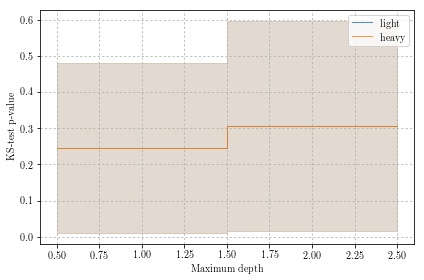

In [82]:
fig, ax = plt.subplots()
for composition in comp_list:
#     upper_err = np.copy(pval_sys_err[composition])
#     upper_err = [val if ((pval[composition][i] + val) < 1) else 1-pval[composition][i] for i, val in enumerate(upper_err)]
#     lower_err = np.copy(pval_sys_err[composition])
#     lower_err = [val if ((pval[composition][i] - val) > 0) else pval[composition][i] for i, val in enumerate(lower_err)]
    plotting.plot_steps(max_depth_list, pval[composition], pval_sys_err[composition], ax,
                color_dict[composition], composition)
#     if composition == 'light':
#         ax.errorbar(max_depth_list -0.25/2, pval[composition],
#                     yerr=[lower_err, upper_err],
#                     marker='.', linestyle=':',
#                     label=composition, alpha=0.75)
#     if composition == 'heavy':
#         ax.errorbar(max_depth_list + 0.25/2, pval[composition],
#                     yerr=[lower_err, upper_err],
#                     marker='.', linestyle=':',
#                     label=composition, alpha=0.75)
plt.ylabel('KS-test p-value')
plt.xlabel('Maximum depth')
# plt.ylim([0, 1])
# plt.ylim([-0.1, 1.1])
plt.legend()
plt.grid()
plt.savefig('/home/jbourbeau/public_html/figures/composition/parameter-tuning/ks-test.png')
plt.show()

### Max features

[CV] classifier__max_features=1 ......................................
[CV] classifier__max_features=2 ......................................
[CV] classifier__max_features=3 ......................................
[CV] classifier__max_features=4 ......................................
[CV] classifier__max_features=5 ......................................
[CV] classifier__max_features=6 ......................................
[CV] classifier__max_features=7 ......................................
[CV] classifier__max_features=8 ......................................
[CV] classifier__max_features=9 ......................................
[CV] classifier__max_features=1 ......................................
[CV] classifier__max_features=2 ......................................
[CV] classifier__max_features=3 ......................................
[CV] classifier__max_features=4 ......................................
[CV] classifier__max_features=5 ......................................
[CV] c

[Parallel(n_jobs=20)]: Done  45 out of  90 | elapsed:  3.0min remaining:  3.0min


[CV] ............................. classifier__max_features=9 -   2.0s
[CV] classifier__max_features=3 ......................................
[CV] ............................. classifier__max_features=4 -   2.2s
[CV] classifier__max_features=4 ......................................
[CV] ............................. classifier__max_features=5 -   0.9s
[CV] classifier__max_features=5 ......................................
[CV] ............................. classifier__max_features=7 -   1.0s
[CV] classifier__max_features=6 ......................................
[CV] ............................. classifier__max_features=8 -   2.9s
[CV] classifier__max_features=7 ......................................
[CV] ............................. classifier__max_features=6 -   2.8s
[CV] classifier__max_features=8 ......................................
[CV] ............................. classifier__max_features=1 -   0.5s
[CV] classifier__max_features=9 ......................................
[CV] .

[Parallel(n_jobs=20)]: Done  90 out of  90 | elapsed:  5.2min finished


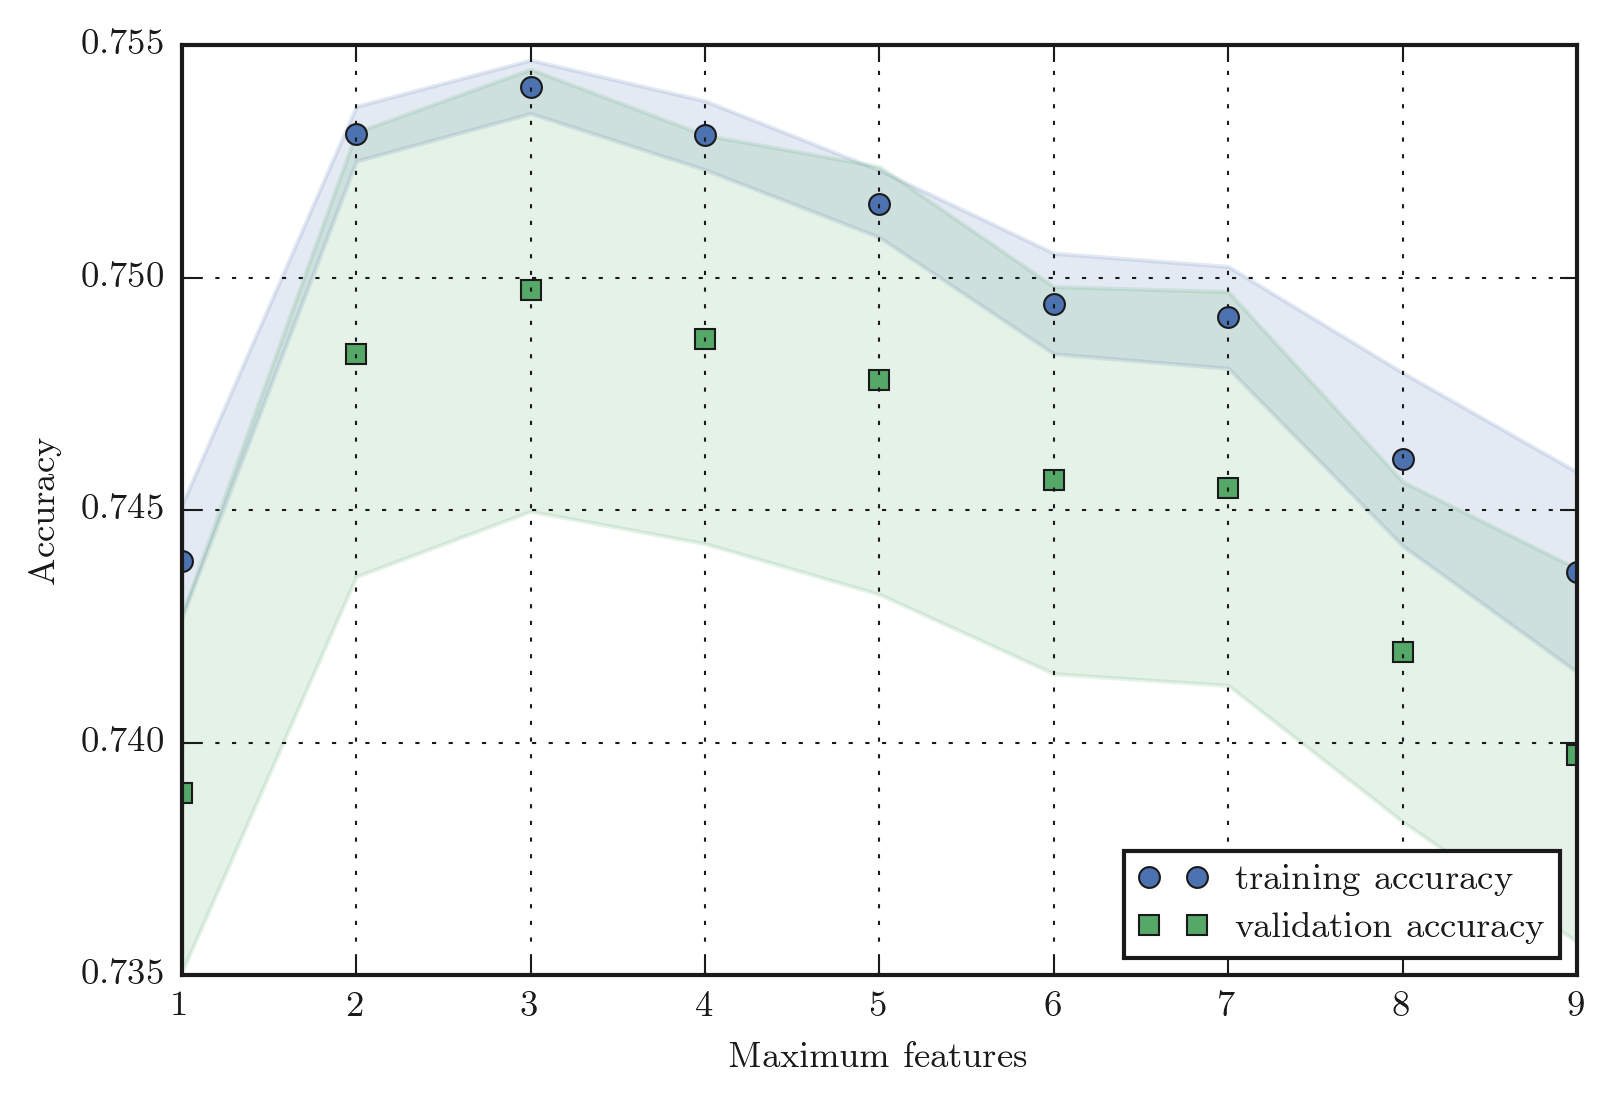

In [10]:
pipeline = comp.get_pipeline('RF')
param_range = np.arange(1, X_train.shape[1])
train_scores, test_scores = validation_curve(
                estimator=pipeline, 
                X=X_train, 
                y=y_train, 
                param_name='classifier__max_features', 
                param_range=param_range,
                cv=10,
                verbose=2,
                n_jobs=20)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='b', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='b')

plt.plot(param_range, test_mean, 
         color='g', linestyle='None', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='g')

plt.grid()
# plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Maximum features')
plt.ylabel('Accuracy')
# plt.ylim([0.8, 1.0])
# plt.savefig('/home/jbourbeau/public_html/figures/composition/parameter-tuning/RF-validation_curve_min_samples_leaf.png', dpi=300)
plt.show()

### Minimum samples in leaf node

[CV] classifier__min_samples_leaf=1 ..................................
[CV] classifier__min_samples_leaf=26 .................................
[CV] classifier__min_samples_leaf=51 .................................
[CV] classifier__min_samples_leaf=76 .................................
[CV] classifier__min_samples_leaf=101 ................................
[CV] classifier__min_samples_leaf=126 ................................
[CV] classifier__min_samples_leaf=151 ................................
[CV] classifier__min_samples_leaf=176 ................................
[CV] classifier__min_samples_leaf=201 ................................
[CV] classifier__min_samples_leaf=226 ................................
[CV] classifier__min_samples_leaf=251 ................................
[CV] classifier__min_samples_leaf=276 ................................
[CV] classifier__min_samples_leaf=301 ................................
[CV] classifier__min_samples_leaf=326 ................................
[CV] c

[Parallel(n_jobs=20)]: Done  80 out of 160 | elapsed:  2.5min remaining:  2.5min


[CV] ....................... classifier__min_samples_leaf=276 -   0.5s
[CV] classifier__min_samples_leaf=101 ................................
[CV] ....................... classifier__min_samples_leaf=226 -   0.4s
[CV] classifier__min_samples_leaf=126 ................................
[CV] ....................... classifier__min_samples_leaf=126 -   0.3s
[CV] classifier__min_samples_leaf=151 ................................
[CV] ....................... classifier__min_samples_leaf=101 -   3.8s
[CV] classifier__min_samples_leaf=176 ................................
[CV] ....................... classifier__min_samples_leaf=101 -   0.4s
[CV] classifier__min_samples_leaf=201 ................................
[CV] ....................... classifier__min_samples_leaf=126 -   0.4s
[CV] classifier__min_samples_leaf=226 ................................
[CV] ....................... classifier__min_samples_leaf=176 -   1.2s
[CV] classifier__min_samples_leaf=251 ................................
[CV] .

[Parallel(n_jobs=20)]: Done 160 out of 160 | elapsed:  4.7min finished


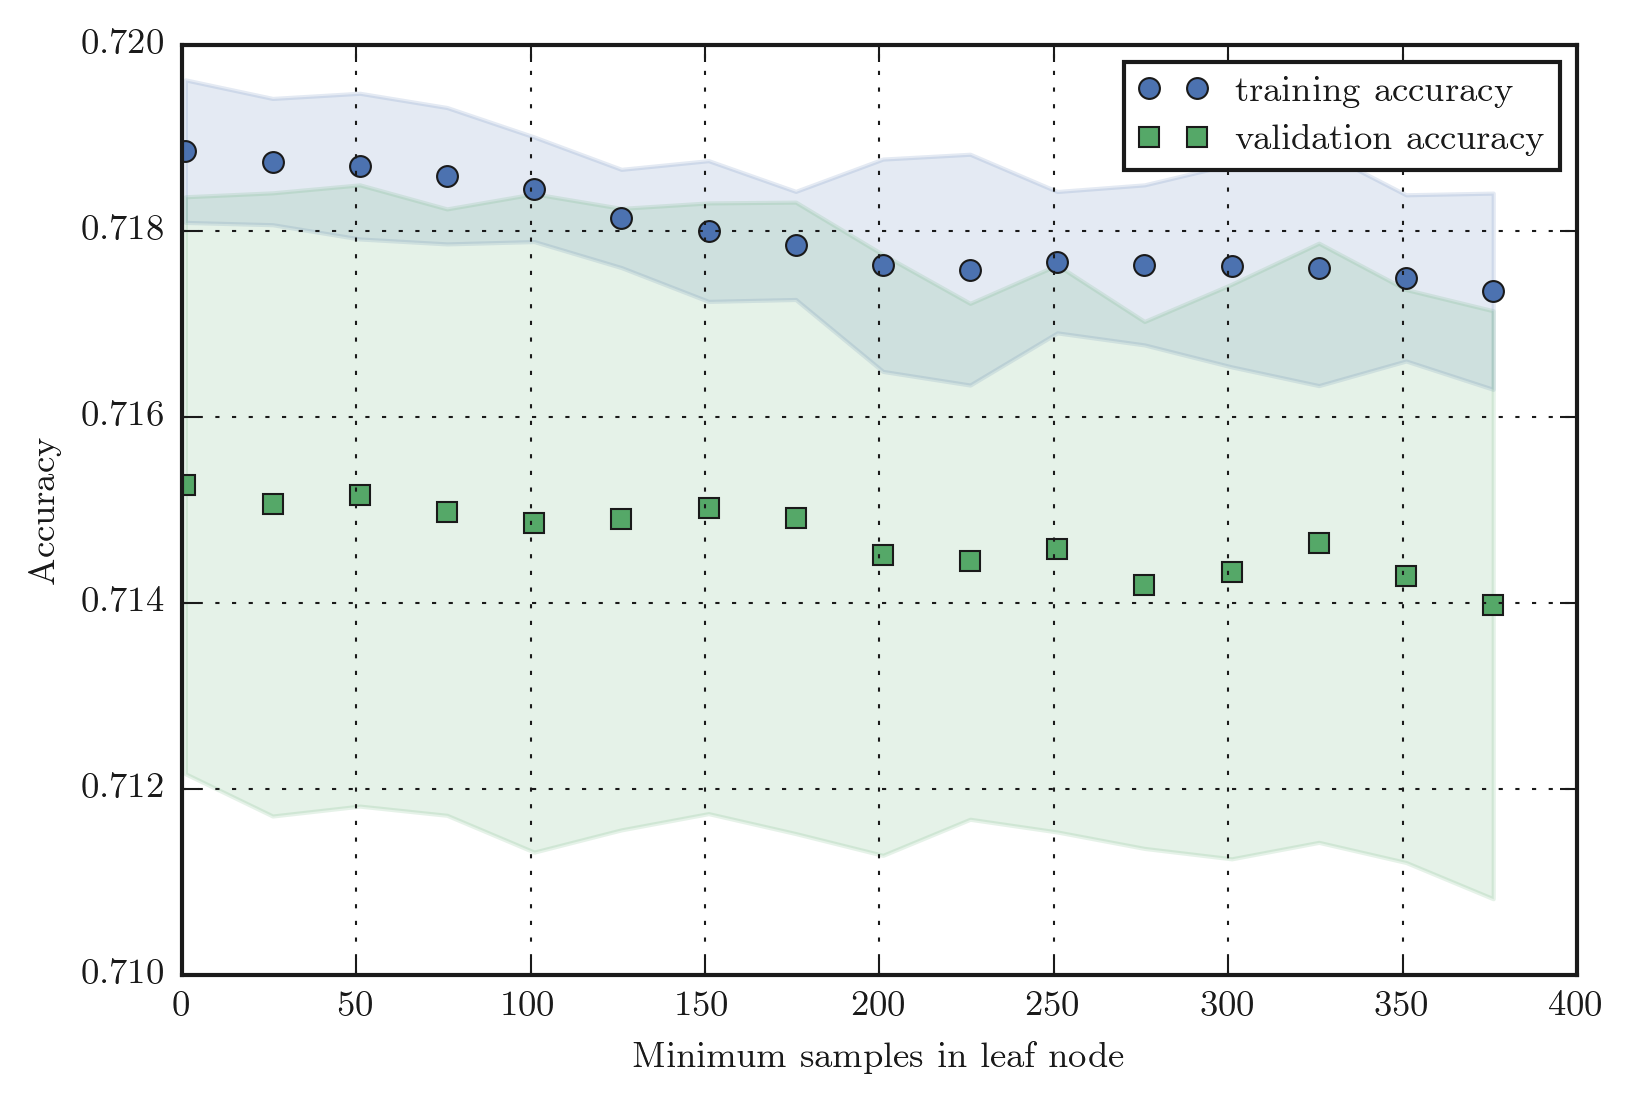

In [7]:
pipeline = comp.get_pipeline('RF')
param_range = np.arange(1, 400, 25)
train_scores, test_scores = validation_curve(
                estimator=pipeline, 
                X=X_train, 
                y=y_train, 
                param_name='classifier__min_samples_leaf', 
                param_range=param_range,
                cv=10,
                verbose=2,
                n_jobs=20)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='b', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='b')

plt.plot(param_range, test_mean, 
         color='g', linestyle='None', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='g')

plt.grid()
# plt.xscale('log')
plt.legend()
plt.xlabel('Minimum samples in leaf node')
plt.ylabel('Accuracy')
# plt.ylim([0.8, 1.0])
# plt.savefig('/home/jbourbeau/public_html/figures/composition/parameter-tuning/RF-validation_curve_min_samples_leaf.png', dpi=300)
plt.show()

## KS-test tuning

### Maximum depth

In [20]:
pval

{'heavy': array([  7.16894934e-01,   6.76231102e-01,   6.75417490e-01,
          5.46730739e-01,   5.68780852e-01,   4.40231335e-01,
          4.82516082e-01,   5.14720962e-01,   5.16080561e-01,
          5.00066822e-01,   3.96053875e-01,   2.12820818e-01,
          3.65621330e-02,   2.58837771e-04,   1.52490663e-07]),
 'light': array([  7.16894934e-01,   6.76231102e-01,   6.75417490e-01,
          5.46730739e-01,   5.68780852e-01,   4.40231335e-01,
          4.82516082e-01,   5.14720962e-01,   5.16080561e-01,
          5.00066822e-01,   3.96053875e-01,   2.12820818e-01,
          3.65621330e-02,   2.58837771e-04,   1.52490663e-07])}

### Minimum samples in leaf node

In [ ]:
comp_list = np.unique(df['MC_comp_class'])
min_samples_list = np.arange(1, 400, 25)
pval = defaultdict(list)
ks_stat = defaultdict(list)
print('min_samples_leaf = ', end='')
for min_samples_leaf in min_samples_list:
    print('{}...'.format(min_samples_leaf), end='')
    pipeline = comp.get_pipeline('RF')
    params = {'max_depth': 4, 'min_samples_leaf': min_samples_leaf}
    pipeline.named_steps['classifier'].set_params(**params)
    pipeline.fit(X_train, y_train)
    test_probs = pipeline.predict_proba(X_test)
    train_probs = pipeline.predict_proba(X_train)
    for class_ in pipeline.classes_:
        pval[le.inverse_transform(class_)].append(stats.ks_2samp(test_probs[:, class_], train_probs[:, class_])[1])
fig, ax = plt.subplots()
for composition in pval:
    ax.plot(min_samples_list, pval[composition], linestyle='-.', label=composition)
plt.ylabel('KS-test p-value')
plt.xlabel('Minimum samples leaf node')
plt.legend()
plt.grid()
plt.show()

### Maximum depth for various minimum samples in leaf node

min_samples_leaf = 1...100...200...300...

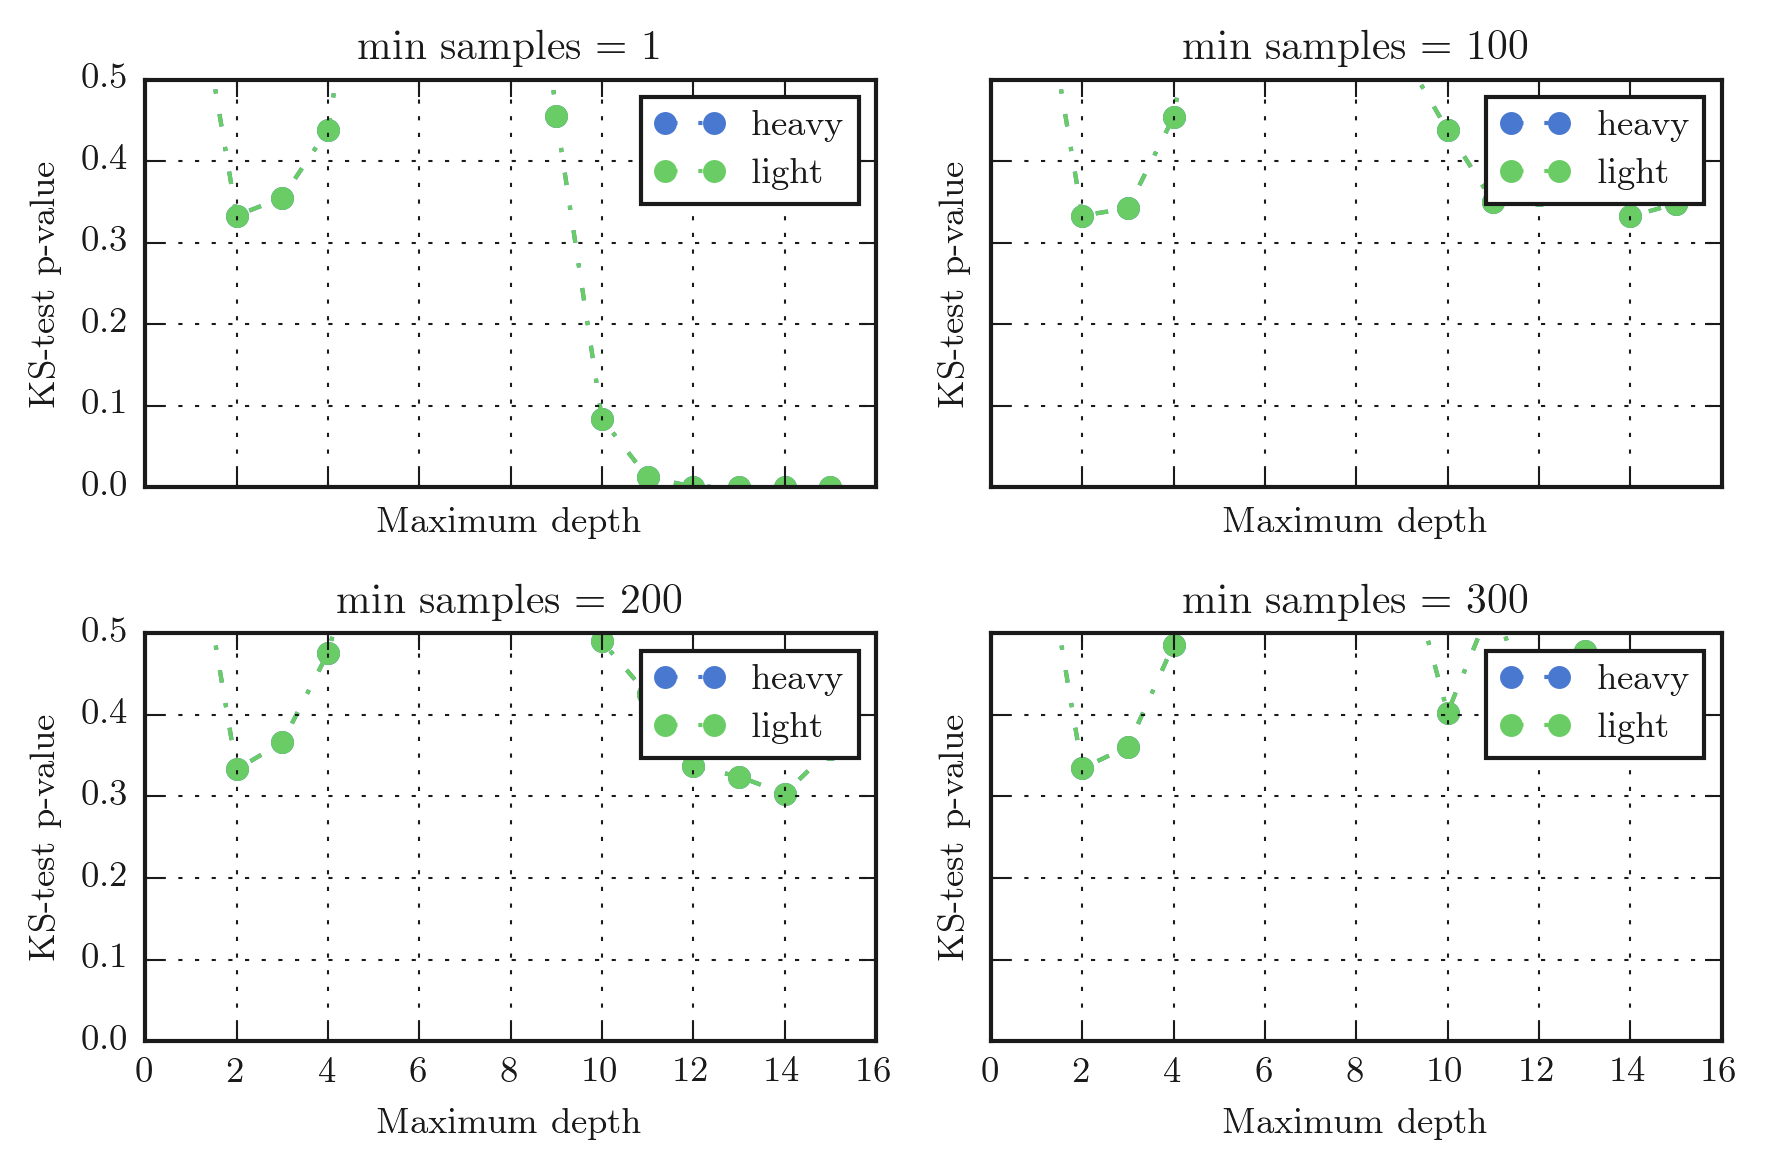

In [11]:
# comp_list = np.unique(df['MC_comp_class'])
comp_list = ['light']
min_samples_list = [1, 25, 50, 75]
min_samples_list = [1, 100, 200, 300]
fig, axarr = plt.subplots(2, 2, sharex=True, sharey=True)
print('min_samples_leaf = ', end='')
for min_samples_leaf, ax in zip(min_samples_list, axarr.flatten()):
    print('{}...'.format(min_samples_leaf), end='')
    max_depth_list = np.arange(1, 16)
    pval = defaultdict(list)
    ks_stat = defaultdict(list)
    for max_depth in max_depth_list:
        pipeline = comp.get_pipeline('RF')
        params = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
        pipeline.named_steps['classifier'].set_params(**params)
        pipeline.fit(X_train, y_train)
        test_probs = pipeline.predict_proba(X_test)
        train_probs = pipeline.predict_proba(X_train)
        for class_ in pipeline.classes_:
            pval[le.inverse_transform(class_)].append(stats.ks_2samp(test_probs[:, class_], train_probs[:, class_])[1])
    for composition in pval:
        ax.plot(max_depth_list, pval[composition], linestyle='-.', label=composition)
    ax.set_ylabel('KS-test p-value')
    ax.set_xlabel('Maximum depth')
    ax.set_title('min samples = {}'.format(min_samples_leaf))
    ax.set_ylim([0, 0.5])
    ax.legend()
    ax.grid()
plt.tight_layout()
plt.show()